In [1]:
from pathlib import Path
from mapillary_sls.datasets.msls import MSLS
from mapillary_sls.datasets.generic_dataset import ImagesFromList
from mapillary_sls.utils.utils import configure_transform
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from mapillary_sls.utils.visualize import denormalize, visualize_triplets
from mapillary_sls.utils.eval import download_msls_sample

# Download MSLS sample

In [4]:
SAMPLE_CITIES = "zurich"

root_dir = Path('/datasets/msls').absolute()

#if not root_dir.exists():
    #download_msls_sample(root_dir)


# Load dataset for testing


In [5]:
# get transform
meta = {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}
transform = configure_transform(image_dim = (480, 640), meta = meta)

# positive are defined within a radius of 25 m 阳性定义在25米的半径范围内
posDistThr = 25

# choose task to test on [im2im, seq2im, im2seq, seq2seq]
task = 'seq2seq'

# choose sequence length
seq_length = 3

# choose subtask to test on [all, s2w, w2s, o2n, n2o, d2n, n2d]
subtask = 'all'

val_dataset = MSLS(root_dir, cities = SAMPLE_CITIES, transform = transform, mode = 'test',
                   task = task, seq_length = seq_length, subtask = subtask, posDistThr = posDistThr)

opt = {'batch_size': 1}

# get images
qLoader = DataLoader(ImagesFromList(val_dataset.qImages[val_dataset.qIdx], transform), **opt)
dbLoader = DataLoader(ImagesFromList(val_dataset.dbImages, transform), **opt)

# get positive index (we allow some more slack: default 25 m)
pIdx = val_dataset.pIdx

=====> zurich


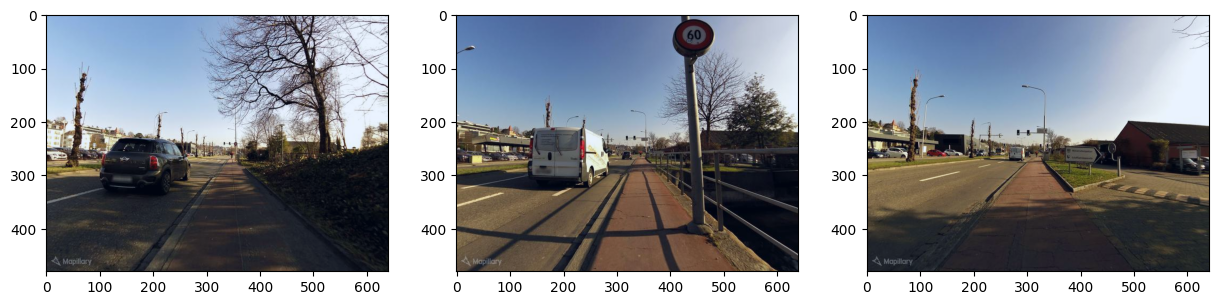

In [ ]:
for batch in qLoader:
    x, y = batch

    plt.figure(figsize=(15,10))
    for i,im in enumerate(x):
        plt.subplot(1,seq_length, i+1)
        plt.imshow(denormalize(im[0].permute(1,2,0)))
    plt.show()
    break

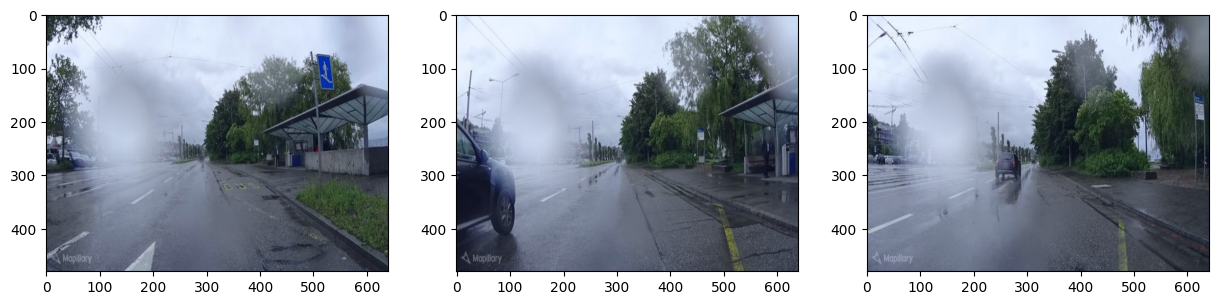

In [ ]:
for batch in dbLoader:
    x, y = batch

    plt.figure(figsize=(15,10))
    for i,im in enumerate(x):
        plt.subplot(1,seq_length, i+1)
        plt.imshow(denormalize(im[0].permute(1,2,0)))
    plt.show() 
    break

# Load dataset for training (triplets)

In [6]:
posDistThr = 5

# negatives are defined outside a radius of 25 m
negDistThr = 25

# number of negatives per triplet
nNeg = 5

# number of cached queries
cached_queries = 6

# number of cached negatives
cached_negatives = 100

# whether to use positive sampling
positive_sampling = True

# choose the cities to load
cities = SAMPLE_CITIES

# choose task to test on [im2im, seq2im, im2seq, seq2seq]
task = 'seq2seq'

# choose sequence length
seq_length = 3

train_dataset = MSLS(root_dir, cities = cities, transform = transform, mode = 'train', task = task, seq_length = seq_length,
                    negDistThr = negDistThr, posDistThr = posDistThr, nNeg = nNeg, cached_queries = cached_queries,
                    cached_negatives = cached_negatives, positive_sampling = positive_sampling)


=====> zurich
#Sideways [0/895]; #Night; [0/895]
Forward and Day weighted with 1.0000


/home/mlq/projects/mapillary_sls-main/mapillary_sls/datasets/msls.py:217: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.pIdx = np.asarray(self.pIdx)
/home/mlq/projects/mapillary_sls-main/mapillary_sls/datasets/msls.py:218: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.nonNegIdx = np.asarray(self.nonNegIdx)


In [11]:
# divides dataset into smaller cache sets
train_dataset.new_epoch()

# creates triplets on the smaller cache set
train_dataset.update_subcache()

# create data loader
opt = {'batch_size': 1, 'shuffle': False}
trainDataloader = DataLoader(train_dataset, **opt)

# visualize a triplet
for batch in trainDataloader:
    print(batch[0].shape)
    print(batch[1])

    # visualize_triplets(batch, task)
    break


torch.Size([1, 21, 3, 480, 640])
tensor([[-1,  1,  0,  0,  0,  0,  0]])
